In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:/bobo/data_analysis/project2/used cars 2.csv')
df.head()

,Sales_ID,name,year,selling_price,km_driven,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,sold
0,1,Maruti,2014,450000,145500,East,District of Columbia,Washington,Diesel,Individual,Manual,First_Owner,23.40,1248,74.00,190Nm@ 2000rpm,5,Y
1,2,Skoda,2014,370000,120000,East,New York,New York City,Diesel,Individual,Manual,Second_Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5,Y
2,3,Honda,2006,158000,140000,Central,Illinois,Chicago,Petrol,Individual,Manual,Third_Owner,17.70,1497,78.00,"12.7@ 2,700(kgm@ rpm)",5,Y
3,4,Hyundai,2010,225000,127000,Central,Illinois,Chicago,Diesel,Individual,Manual,First_Owner,23.00,1396,90.00,22.4 kgm at 1750-2750rpm,5,Y
4,5,Maruti,2007,130000,120000,East,New York,New York City,Petrol,Individual,Manual,First_Owner,16.10,1298,88.20,"11.5@ 4,500(kgm@ rpm)",5,Y


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7906 entries, 0 to 7905
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sales_ID           7906 non-null   int64  
 1   name               7906 non-null   object 
 2   year               7906 non-null   int64  
 3   selling_price      7906 non-null   int64  
 4   km_driven          7906 non-null   int64  
 5   Region             7906 non-null   object 
 6   State or Province  7906 non-null   object 
 7   City               7906 non-null   object 
 8   fuel               7906 non-null   object 
 9   seller_type        7906 non-null   object 
 10  transmission       7906 non-null   object 
 11  owner              7906 non-null   object 
 12  mileage            7906 non-null   float64
 13  engine             7906 non-null   int64  
 14  max_power          7906 non-null   float64
 15  torque             7906 non-null   object 
 16  seats              7906 

In [ ]:
# to check for empty values
df.isnull().sum()

Sales_ID             0
name                 0
year                 0
selling_price        0
km_driven            0
Region               0
State or Province    0
City                 0
fuel                 0
seller_type          0
transmission         0
owner                0
mileage              0
engine               0
max_power            0
torque               0
seats                0
sold                 0
dtype: int64

In [ ]:
# to check for duplicates
df.duplicated().sum()

0

In [ ]:
zero_prices = (df['selling_price'] <= 0).sum()
negative_km = (df['km_driven'] < 0).sum()

Zero/negative prices: 0
Negative kilometers: 0


In [11]:
# adding features (feature engineering)
df['car_age'] = 2024 - df['year']
df['price_category'] = pd.cut(df['selling_price'], bins=[0, 300000, 800000, 1500000, float('inf')],
                               labels=['budget','medium','premium','luxury'])
df['usage_category'] = pd.cut(df['km_driven'], bins=[0, 30000, 80000, 150000, float('inf')],
                               labels=['low','medium','high','very high'])
categorical_cols = ['fuel', 'seller_type', 'transmission', 'owner']
for col in categorical_cols:
    df[col] = df[col].str.title().str.strip()

In [12]:
df.describe()

,Sales_ID,year,selling_price,km_driven,mileage,engine,max_power,seats,car_age
count,7906.000000,7906.000000,7.906000e+03,7.906000e+03,7906.000000,7906.000000,7906.000000,7906.000000,7906.000000
mean,4070.106248,2013.983936,6.498137e+05,6.918866e+04,19.419861,1458.708829,91.587374,5.416393,10.016064
std,2345.770159,3.863695,8.135827e+05,5.679230e+04,4.036263,503.893057,35.747216,0.959208,3.863695
min,1.000000,1994.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,32.800000,2.000000,4.000000
25%,2037.250000,2012.000000,2.700000e+05,3.500000e+04,16.780000,1197.000000,68.050000,5.000000,7.000000
50%,4076.500000,2015.000000,4.500000e+05,6.000000e+04,19.300000,1248.000000,82.000000,5.000000,9.000000
75%,6102.000000,2017.000000,6.900000e+05,9.542500e+04,22.320000,1582.000000,102.000000,5.000000,12.000000
max,8128.000000,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000,30.000000


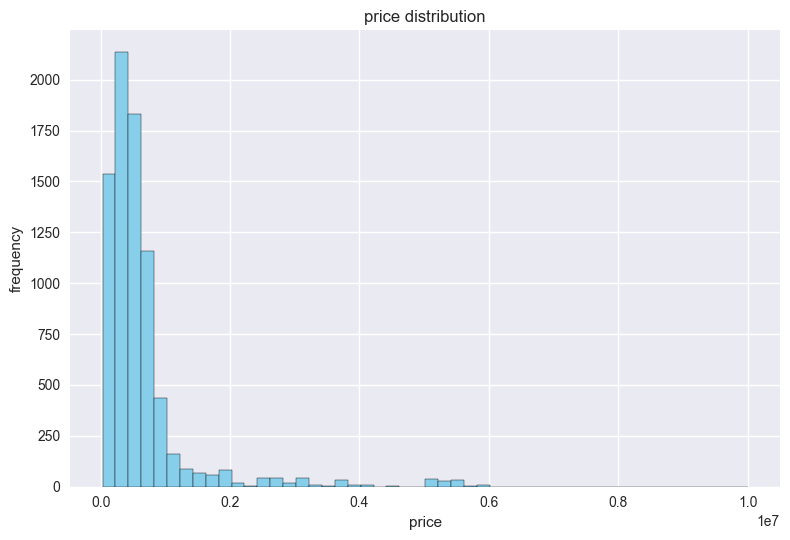

In [ ]:
plt.hist(df['selling_price'], bins=50, color='skyblue', edgecolor='black')
plt.title('price distribution')
plt.xlabel('price')
plt.ylabel('frequency')

plt.tight_layout()
plt.show()

Text(0, 0.5, 'price')

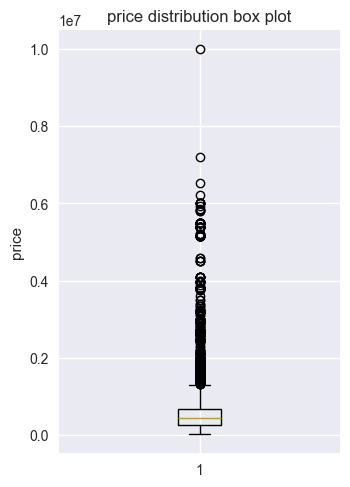

In [ ]:
plt.boxplot(df['selling_price'])
plt.title('price distribution box plot')
plt.ylabel('price')

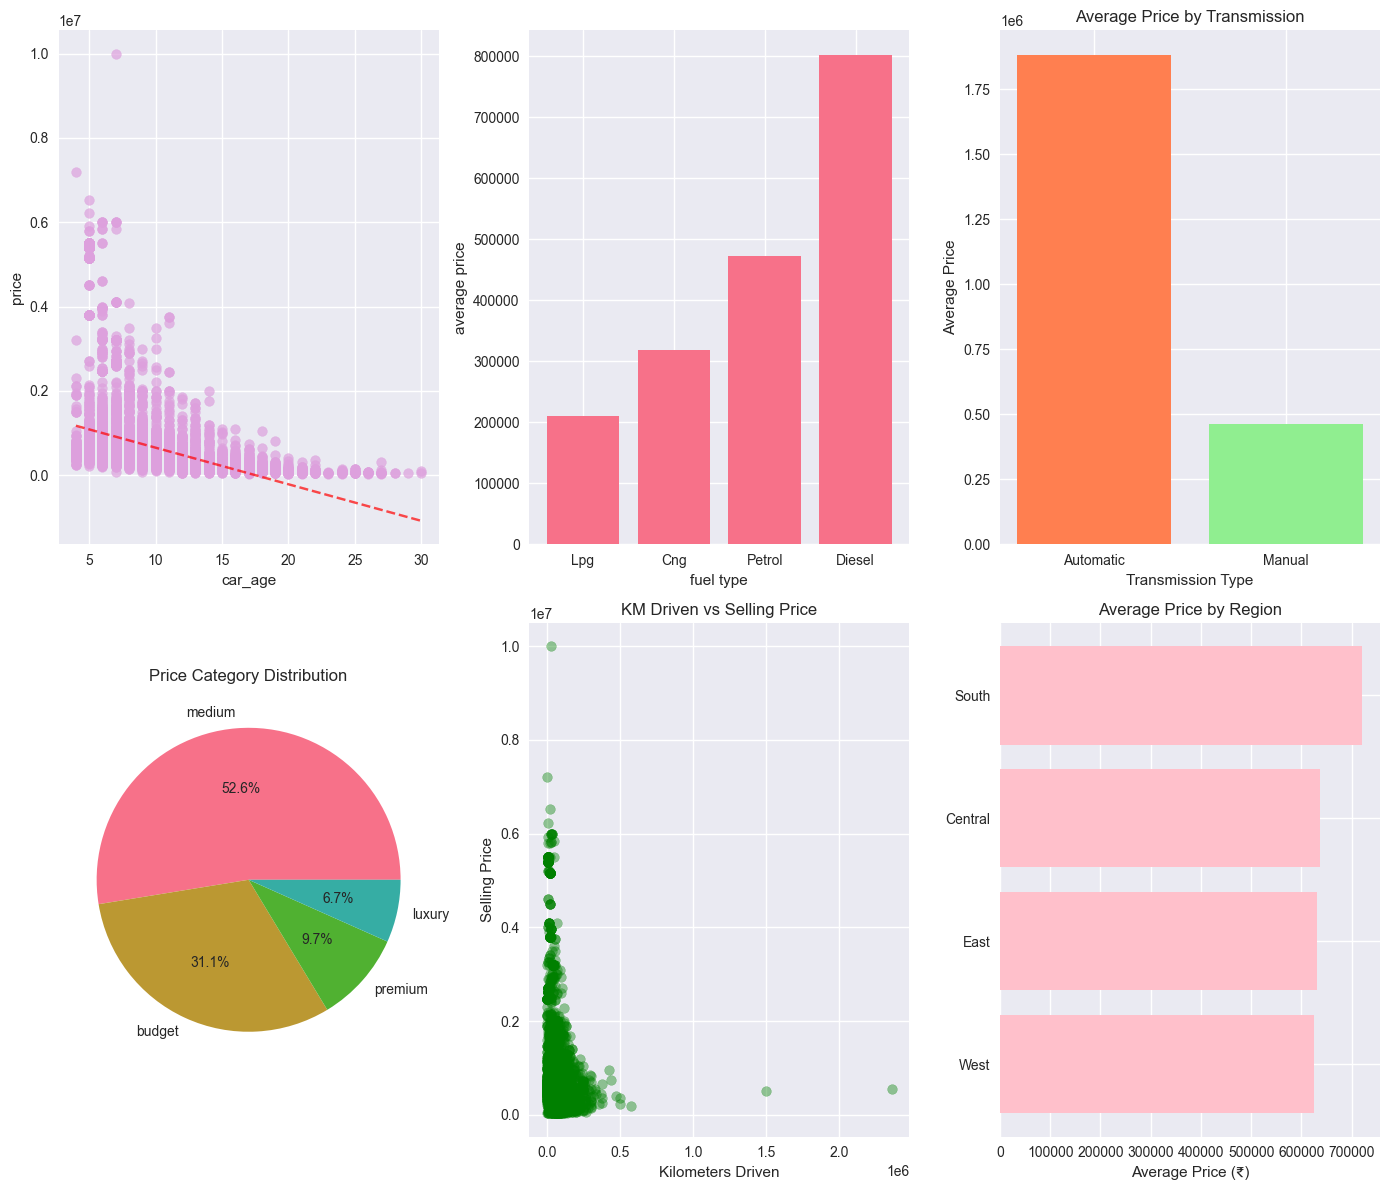

In [ ]:
fig, ax = plt.subplots(ncols=3, nrows=2)
fig.set_size_inches((14,12))

ax[0,0].scatter(df['car_age'], df['selling_price'], alpha=0.7, color='plum')
ax[0,0].set_xlabel('car_age')
ax[0,0].set_ylabel('price')

fuel_prices = df.groupby('fuel')['selling_price'].mean().sort_values()
ax[0,1].bar(fuel_prices.index, fuel_prices.values)
ax[0,1].set_xlabel('fuel type')
ax[0,1].set_ylabel('average price')

trans_prices = df.groupby('transmission')['selling_price'].mean()
ax[0,2].bar(trans_prices.index, trans_prices.values, color=['coral', 'lightgreen'])
ax[0,2].set_title('Average Price by Transmission')
ax[0,2].set_xlabel('Transmission Type')
ax[0,2].set_ylabel('Average Price')

ax[1,1].scatter(df['km_driven'], df['selling_price'], alpha=0.4, color='green')
ax[1,1].set_title('KM Driven vs Selling Price')
ax[1,1].set_xlabel('Kilometers Driven')
ax[1,1].set_ylabel('Selling Price')

price_cat_counts = df['price_category'].value_counts()
ax[1,0].pie(price_cat_counts.values, labels=price_cat_counts.index, autopct='%1.1f%%')
ax[1,0].set_title('Price Category Distribution')

region_prices = df.groupby('Region')['selling_price'].mean().sort_values()
ax[1,2].barh(range(len(region_prices)), region_prices.values, color='pink')
ax[1,2].set_yticks(range(len(region_prices)), region_prices.index)
ax[1,2].set_title('Average Price by Region')
ax[1,2].set_xlabel('Average Price')


plt.tight_layout()


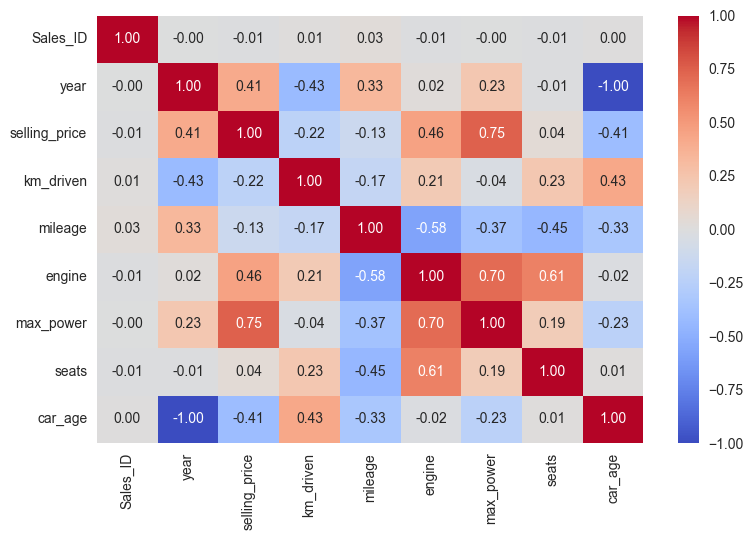

In [23]:
num_columns = df.select_dtypes(include=['number']).columns
correlation_matrix = df[num_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.tight_layout()


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoders = {}
categorical_features = df.select_dtypes(include=['object']).columns
for feature in categorical_features:
    le = LabelEncoder()
    df[f'{feature}_encoded'] = le.fit_transform(df[feature].astype(str))
    label_encoders[feature] = le


num_feats = list(df.select_dtypes(include=['number']).columns)
num_feats.remove('selling_price')   
encoded_feats = [f + '_encoded' for f in categorical_features]
features = num_feats + encoded_feats

X = df[features]
y = df['selling_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)



In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

In [56]:
from sklearn.metrics import mean_squared_error, r2_score
rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
r2 = r2_score(y_test, rf_pred)
r2

0.9763290621024007

In [53]:
feature_importance = (
    pd.DataFrame({
        'feature': features,
        'importance': rf_model.feature_importances_
    })
    .sort_values('importance', ascending=False)
    .reset_index(drop=True)
)

print(feature_importance)

                      feature  importance
0                   max_power    0.697463
1                     car_age    0.108015
2                        year    0.092978
3              torque_encoded    0.019328
4                   km_driven    0.014455
5              torque_encoded    0.013736
6                      engine    0.012824
7                     mileage    0.010887
8                name_encoded    0.004527
9                name_encoded    0.003931
10                      seats    0.003591
11                   Sales_ID    0.002982
12        seller_type_encoded    0.002455
13        seller_type_encoded    0.001832
14               City_encoded    0.001620
15               City_encoded    0.001342
16  State or Province_encoded    0.001264
17  State or Province_encoded    0.001041
18       transmission_encoded    0.000995
19       transmission_encoded    0.000827
20               fuel_encoded    0.000721
21              owner_encoded    0.000712
22              owner_encoded    0